In [3]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import warnings
import librosa
import os, sys
from scipy import signal
import IPython.display as ipd
import librosa.display
import soundfile as sf
sys.path.append('..')

warnings.simplefilter(action='ignore', category=FutureWarning)


In [19]:
path = 'sensor_logger/'
audio_file = 'Microphone.caf'

# alice examples
tap_table = path + 'tap_table-2023-03-09_02-14-06/' + audio_file
tap = path + 'tap_lap-2023-03-09_02-23-53/' + audio_file
swipe = path+ 'swipe_rl_standing-2023-03-09_01-44-02/' + audio_file
scroll = path + 'scroll_lap-2023-03-09_02-15-54/' + audio_file
#scroll = path+ 'scrolling_down_to_up-2023-03-02_21-52-03/' + audio_file
#scroll = path + 'scrolling_bottom_to_up_0-2023-03-02_21-22-50/' + audio_file
all_files = glob.glob(os.path.join(path , "**/Microphone.caf"))
tap_table_wav, sr = librosa.load(tap_table, sr=None, mono=True)
tap_wav, sr = librosa.load(tap, sr=None, mono=True)
swipe_wav, sr = librosa.load(swipe, sr=None, mono=True)
scroll_wav, sr = librosa.load(scroll, sr=None, mono=True)

Text(0.5, 1.0, 'scroll')

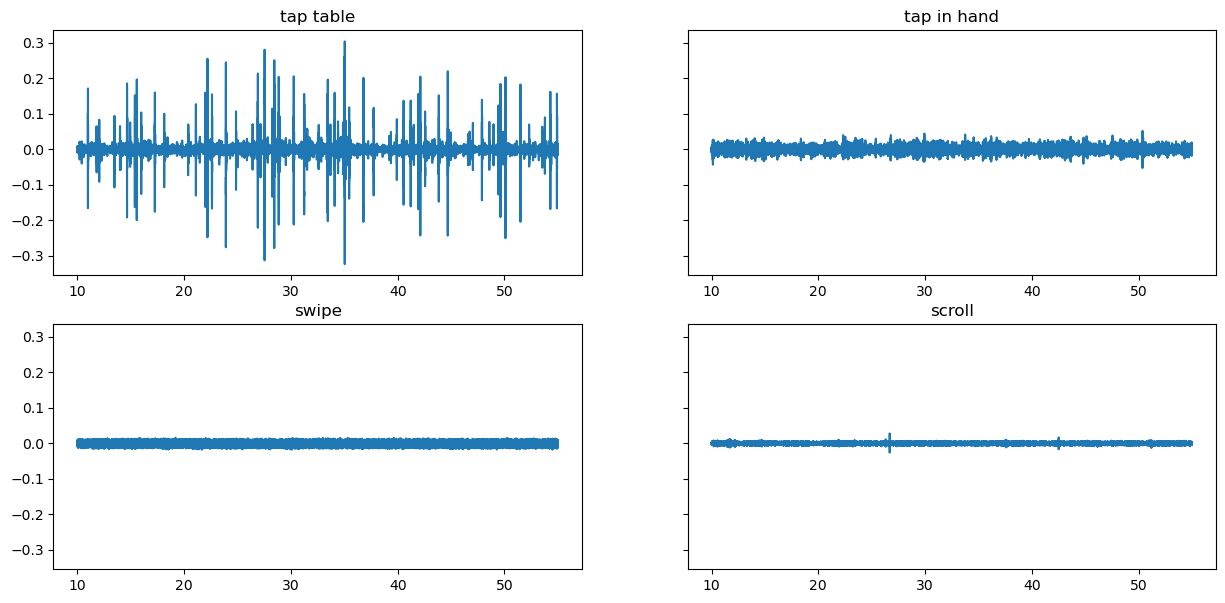

In [20]:
# plot raw audio examples
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(15, 7))
start_time = 10
end_time = 55
time = np.linspace(start_time, end_time, (end_time-start_time)*sr)
ax[0, 0].plot(time, tap_table_wav[start_time*sr:end_time*sr])
ax[0, 0].set_title("tap table")
ax[0, 1].plot(time, tap_wav[start_time*sr:end_time*sr])
ax[0, 1].set_title("tap in hand")
ax[1, 0].plot(time, swipe_wav[start_time*sr:end_time*sr])
ax[1, 0].set_title("swipe")
ax[1, 1].plot(time, scroll_wav[start_time*sr:end_time*sr])
ax[1, 1].set_title("scroll")


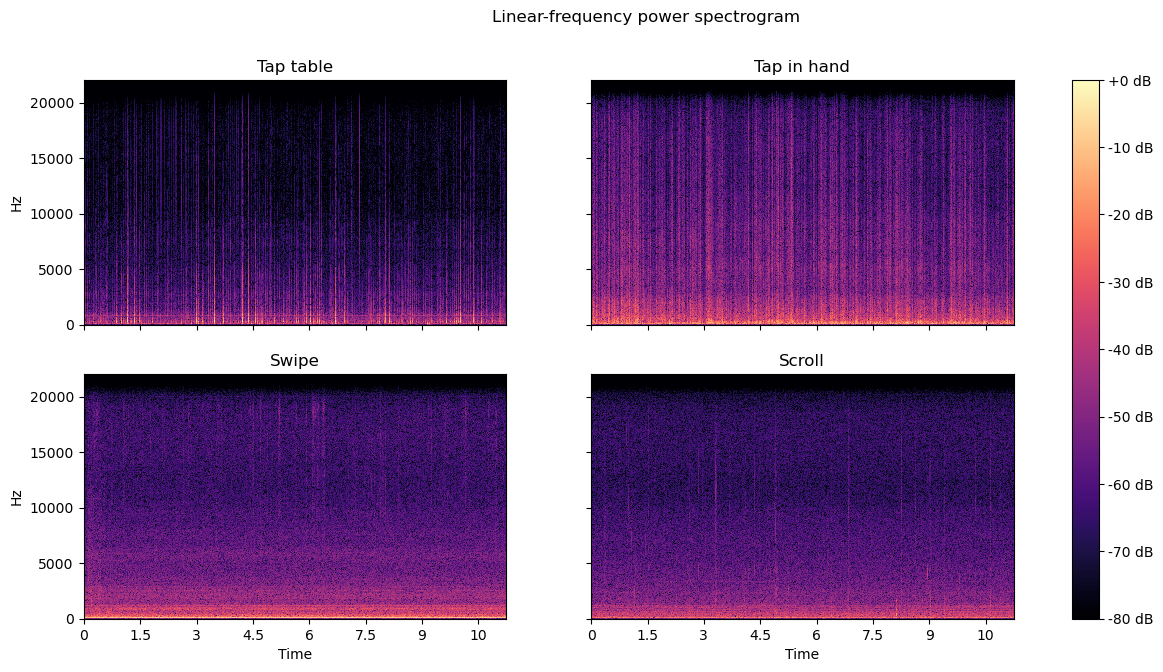

In [21]:
# plot linear frequency spectrograms
N_FFT = 4096
HOP_SIZE = 2048
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharey=True)
tap_table_stft = librosa.amplitude_to_db(np.abs(librosa.stft(tap_table_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
tap_stft = librosa.amplitude_to_db(np.abs(librosa.stft(tap_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
swipe_stft = librosa.amplitude_to_db(np.abs(librosa.stft(swipe_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
scroll_stft = librosa.amplitude_to_db(np.abs(librosa.stft(scroll_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
                    
img = librosa.display.specshow(tap_table_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[0,0])
ax[0,0].set(title='Tap table')
ax[0,0].label_outer()
img = librosa.display.specshow(tap_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[0,1])
ax[0,1].set(title='Tap in hand')
ax[0,1].label_outer()
img = librosa.display.specshow(swipe_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[1,0])
ax[1,0].set(title='Swipe')
ax[1,0].label_outer()
img = librosa.display.specshow(scroll_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[1,1])
ax[1,1].set(title='Scroll')
ax[1,1].label_outer()
plt.suptitle("Linear-frequency power spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

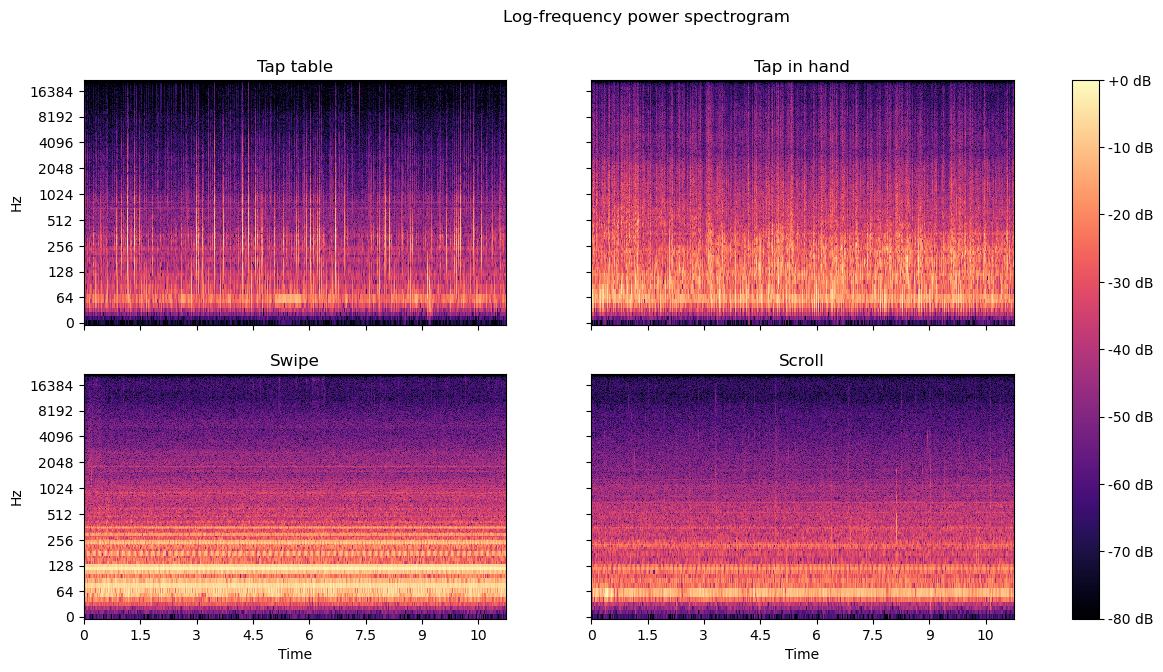

In [22]:
# plot log frequency spectrogram
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharey=True)

img = librosa.display.specshow(tap_table_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[0,0])
ax[0,0].set(title='Tap table')
ax[0,0].label_outer()
img = librosa.display.specshow(tap_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[0,1])
ax[0,1].set(title='Tap in hand')
ax[0,1].label_outer()
img = librosa.display.specshow(swipe_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[1,0])
ax[1,0].set(title='Swipe')
ax[1,0].label_outer()
img = librosa.display.specshow(scroll_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[1,1])
ax[1,1].set(title='Scroll')
ax[1,1].label_outer()
plt.suptitle("Log-frequency power spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [27]:
# sloke audio file examples
tap_table = path + 'tap_while_on_table_0-2023-03-02_21-24-25/' + audio_file
swipe_lr = path+ 'swiping_left_to_right_0-2023-03-02_21-19-43/' + audio_file
swipe_rl = path+ 'swiping_right_to_left_1-2023-03-02_21-50-36/' + audio_file
scroll = path + 'scrolling_bottom_to_up_0-2023-03-02_21-22-50/' + audio_file
tap_table_wav, sr = librosa.load(tap_table, sr=None, mono=True)
swipe_lr_wav, sr = librosa.load(swipe_lr, sr=None, mono=True)
swipe_rl_wav, sr = librosa.load(swipe_rl, sr=None, mono=True)
scroll_wav, sr = librosa.load(scroll, sr=None, mono=True)

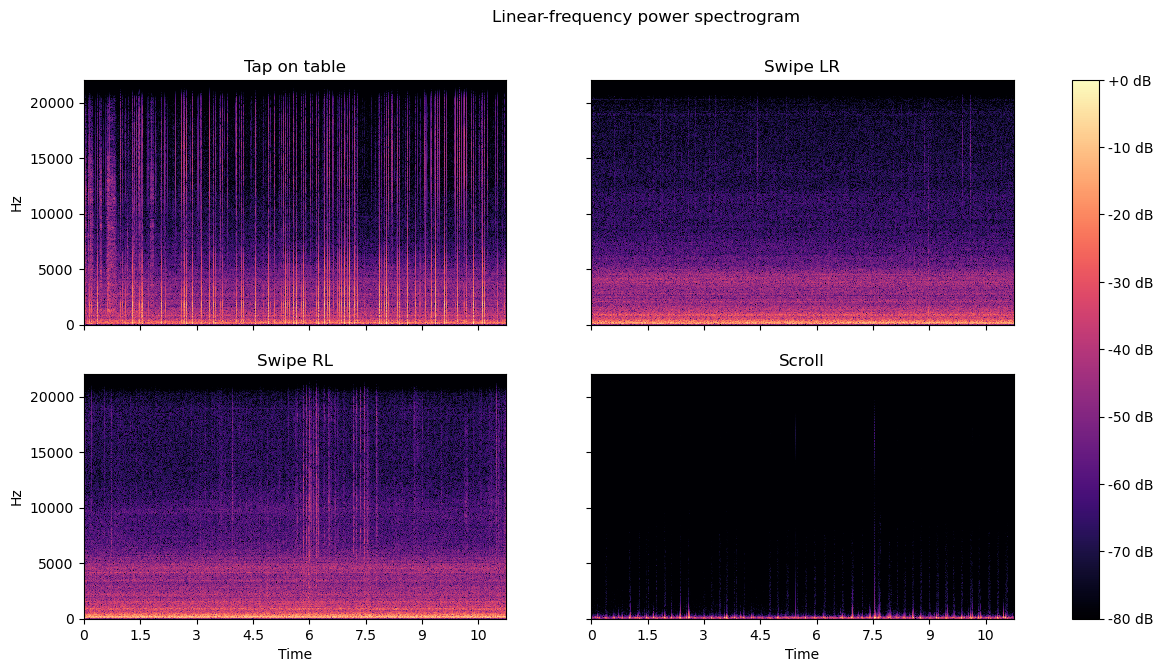

In [28]:
# plot linear frequency spectrograms
N_FFT = 4096
HOP_SIZE = 2048
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharey=True)
tap_table_stft = librosa.amplitude_to_db(np.abs(librosa.stft(tap_table_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
swipe_lr_stft = librosa.amplitude_to_db(np.abs(librosa.stft(swipe_lr_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
swipe_rl_stft = librosa.amplitude_to_db(np.abs(librosa.stft(swipe_rl_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
scroll_stft = librosa.amplitude_to_db(np.abs(librosa.stft(scroll_wav[start_time*sr:end_time*sr], n_fft=N_FFT, hop_length=HOP_SIZE, win_length=N_FFT,
                                                            window='hann', center=True, pad_mode='constant' )), ref=np.max)
                    
img = librosa.display.specshow(tap_table_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[0,0])
ax[0,0].set(title='Tap on table')
ax[0,0].label_outer()
img = librosa.display.specshow(swipe_lr_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[0,1])
ax[0,1].set(title='Swipe LR')
ax[0,1].label_outer()
img = librosa.display.specshow(swipe_rl_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[1,0])
ax[1,0].set(title='Swipe RL')
ax[1,0].label_outer()
img = librosa.display.specshow(scroll_stft, y_axis='linear', x_axis='time',sr=sr, ax=ax[1,1])
ax[1,1].set(title='Scroll')
ax[1,1].label_outer()
plt.suptitle("Linear-frequency power spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

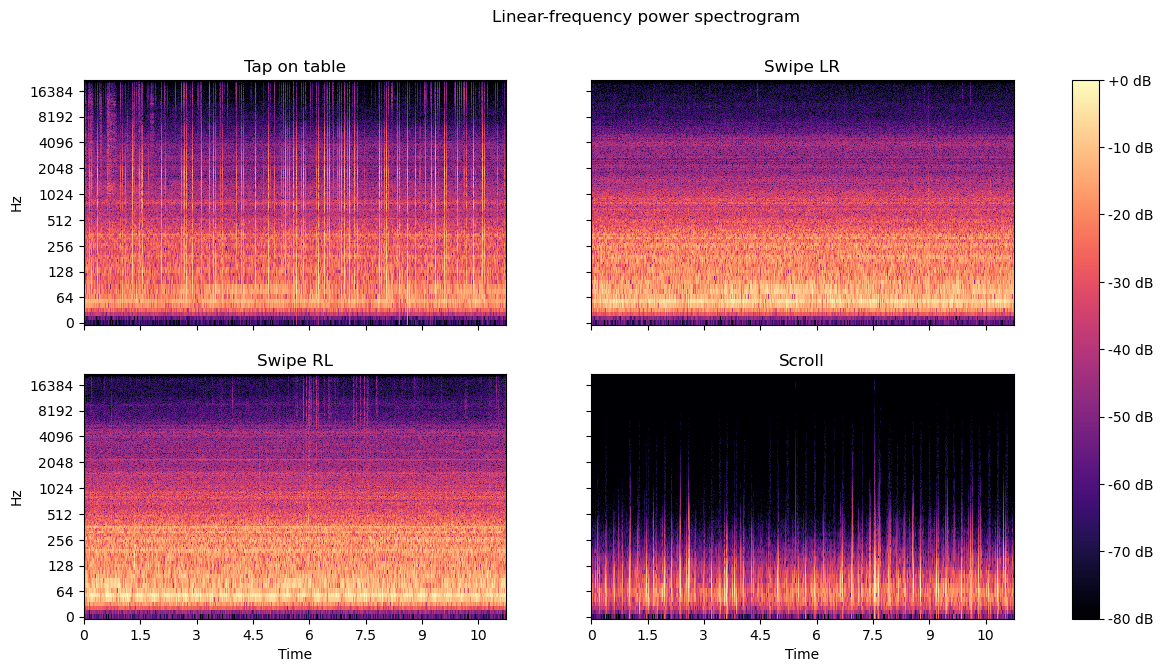

In [29]:
# plot log frequency spectrogram
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharey=True)

img = librosa.display.specshow(tap_table_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[0,0])
ax[0,0].set(title='Tap on table')
ax[0,0].label_outer()
img = librosa.display.specshow(swipe_lr_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[0,1])
ax[0,1].set(title='Swipe LR')
ax[0,1].label_outer()
img = librosa.display.specshow(swipe_rl_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[1,0])
ax[1,0].set(title='Swipe RL')
ax[1,0].label_outer()
img = librosa.display.specshow(scroll_stft, y_axis='log', x_axis='time',sr=sr, ax=ax[1,1])
ax[1,1].set(title='Scroll')
ax[1,1].label_outer()
plt.suptitle("Linear-frequency power spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")